In [56]:
#imports
import tensorflow as tf
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

The aim of this analysis is to look at areas with the highest CO2 emissions in 2021 and consider possible undelying reasons.
Data was take from https://www.data.gov.uk/dataset/723c243d-2f1a-4d27-8b61-cdb93e5b10ff/uk-greenhouse-gas-emissions-local-authority-and-regional

The first step is to load in data and look at important attributes to form an impression of it

In [57]:
#initial

#read in file
train_file_path = 'C:\\Users\\maxch\\Downloads\\2005-21-local-authority-ghg-emissions-csv-dataset-update-060723.csv'
df = pd.read_csv(train_file_path)

#Get important attributes of the dataset
print("Full train dataset shape is {}".format(df.shape))

print('\n Datatypes of each column')
print(df.dtypes)

print('\n Number of nulls in each column')
print(df.isnull().sum())

print('\n Number of unique values in each column')
print(df.nunique())


Full train dataset shape is (523643, 15)

 Datatypes of each column
Country                                                          object
Country Code                                                     object
Region                                                           object
Region Code                                                      object
Second Tier Authority                                            object
Local Authority                                                  object
Local Authority Code                                             object
Calendar Year                                                     int64
LA GHG Sector                                                    object
LA GHG Sub-sector                                                object
Greenhouse gas                                                   object
Territorial emissions (kt CO2e)                                 float64
CO2 emissions within the scope of influence of LAs (kt CO2e)    floa

## Assumptions and Considerations



This analysis strictly focuses on CO2 emissions. Non CO2 emissions totalling 75584 kt CO2e have been omitted.

There are instances of negative emissions form the LULULF (land and forestry) sector. These have been included in calculations.

There are emissions that are Unallocated (i.e. not allocated to a region) which are responsible for rows cotaining na values. These have been considered to have 0 area and population


In [58]:
df=df[df['Greenhouse gas']=='CO2'][df['Calendar Year']==2021]
df['Territorial emissions (kt CO2e)']=df['Territorial emissions (kt CO2e)'].astype(int)
df['Mid-year Population (thousands)']=df['Mid-year Population (thousands)'].fillna(0,inplace=False).astype(int)
df['Area (km2)']=df['Area (km2)'].fillna(0,inplace=False).astype(int)

,Territorial emissions (kt CO2e)
Region,
South East,37999
London,26925
North West,36070
East of England,31042
West Midlands,27820
South West,23737
Yorkshire and the Humber,32686
Scotland,27601
East Midlands,28305


<Axes: xlabel='Region', ylabel='Territorial emissions (kt CO2e)'>

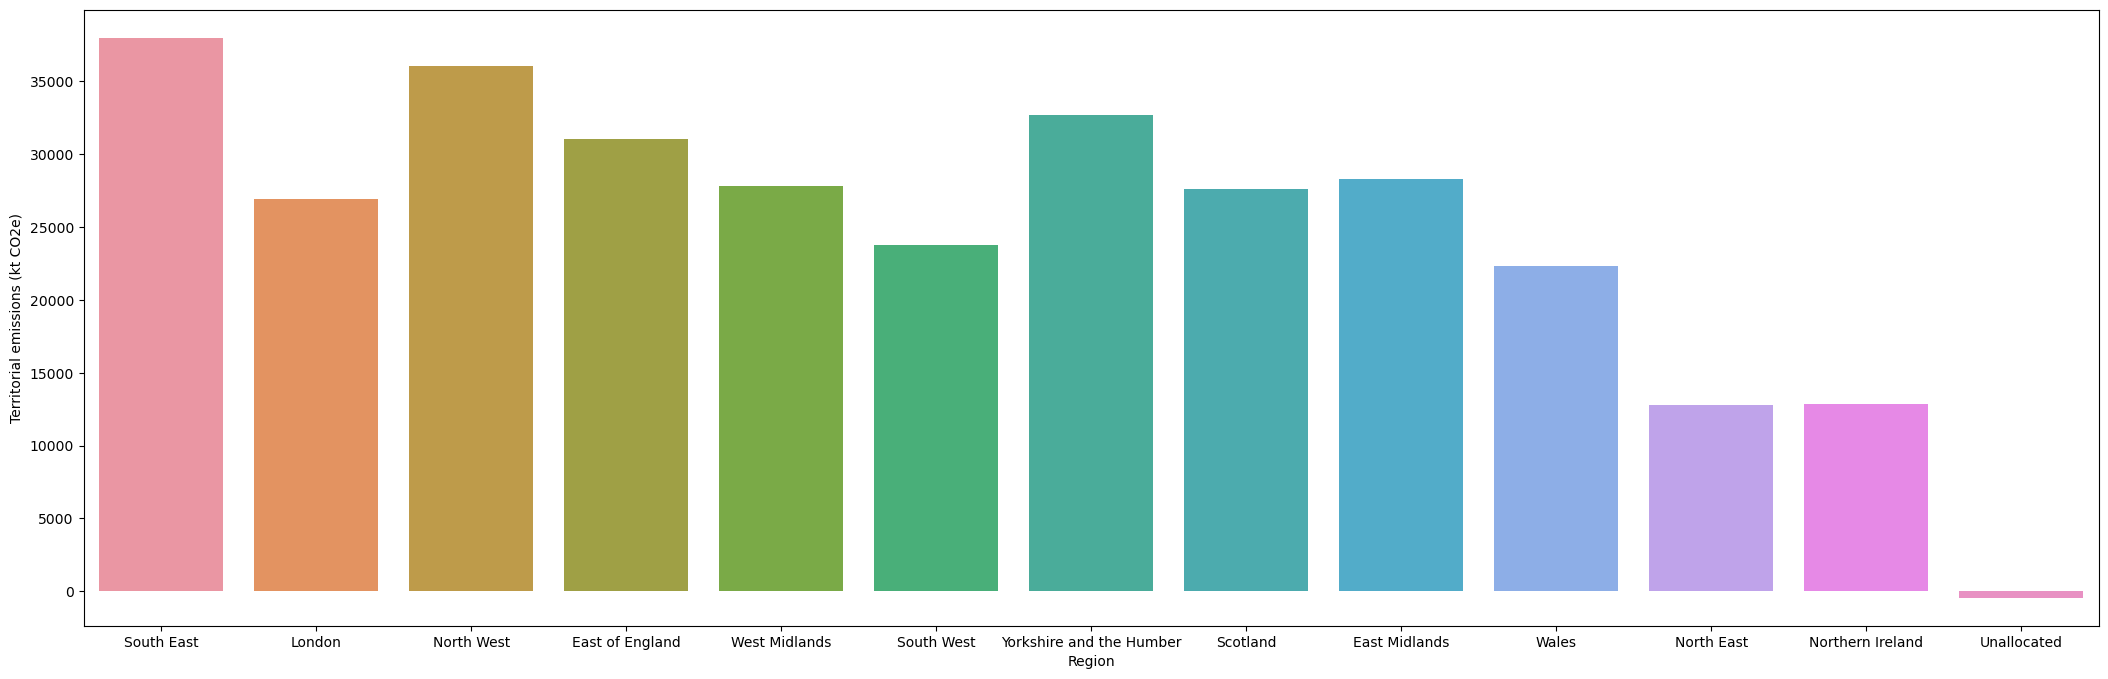

In [59]:
df_county=df[['Region','Mid-year Population (thousands)',"Territorial emissions (kt CO2e)"]].groupby(by=['Region']).sum().sort_values('Mid-year Population (thousands)',ascending=False)
display(pd.DataFrame(df_county['Territorial emissions (kt CO2e)']))
fig, ax = plt.subplots(1, 1, figsize=(26,8))
sns.barplot(x=df_county.index,y=df_county['Territorial emissions (kt CO2e)'], ax=ax)

The region with the highest CO2 emissions in 2021 was the South East with 37999 kt CO2 emitted, 43% above the average of 26642 

Pearson Correlation coefficient table = 
                                 Mid-year Population (thousands)  \
Mid-year Population (thousands)                         1.000000   
Territorial emissions (kt CO2e)                         0.901093   

                                 Territorial emissions (kt CO2e)  
Mid-year Population (thousands)                         0.901093  
Territorial emissions (kt CO2e)                         1.000000  


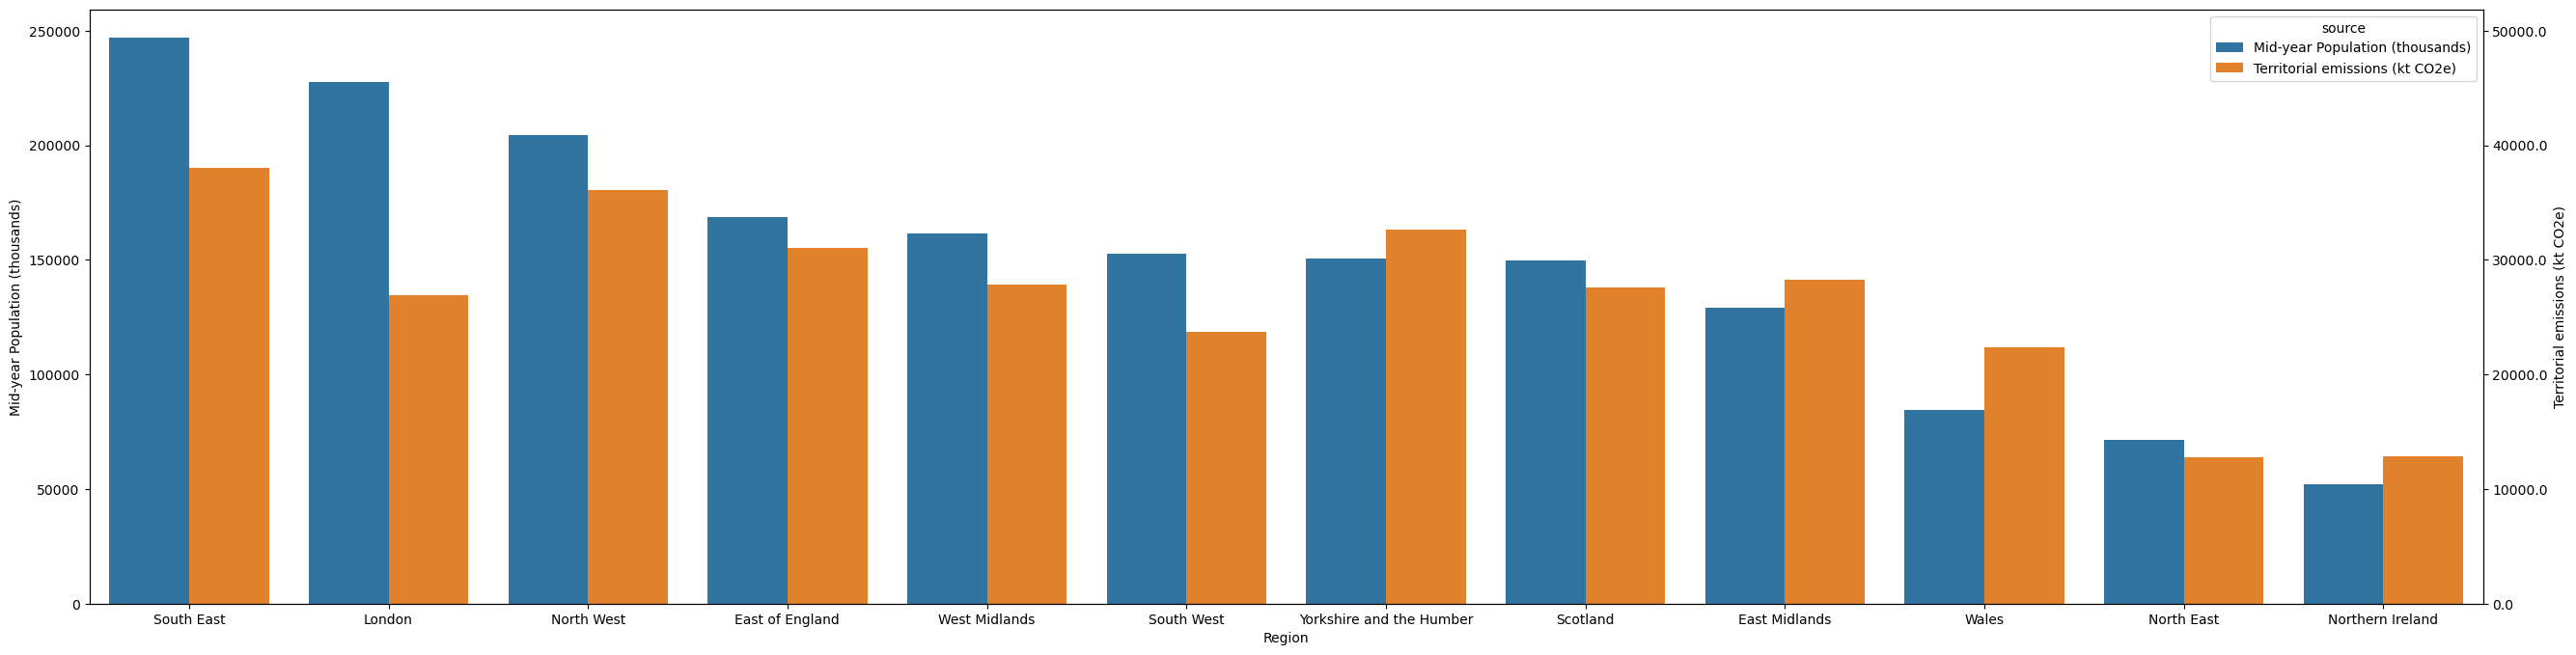

In [60]:
df_county=df[['Region','Mid-year Population (thousands)',"Territorial emissions (kt CO2e)"]].groupby(by=['Region']).sum().sort_values('Mid-year Population (thousands)',ascending=False)#['Territorial emissions (kt CO2e)']
print('Pearson Correlation coefficient table = ')
print(df_county.corr())

df_county['Region']=df_county.index
test_data=df_county[df_county['Region']!='Unallocated']
test_data_melted = pd.melt(test_data, id_vars='Region',\
                           var_name="source", value_name="value_numbers")


mask = test_data_melted.source.isin(["Territorial emissions (kt CO2e)"])
scale = int(test_data_melted[~mask].value_numbers.mean()
            /test_data_melted[mask].value_numbers.mean())
test_data_melted.loc[mask, 'value_numbers'] = test_data_melted.loc[mask, 'value_numbers']*scale

# Plot
fig, ax1 = plt.subplots( figsize=(32,8))
g = sns.barplot(x='Region', y="value_numbers", hue="source",\
                data=test_data_melted, ax=ax1)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('Mid-year Population (thousands)')
ax2 = ax1.twinx()

# Ensure ticks occur at the same positions, then modify labels
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticklabels(np.round(ax1.get_yticks()/scale,1))
ax2.set_ylabel('Territorial emissions (kt CO2e)')

plt.show()

One possible reason for the differences in emissions between region may simply be population and investigating,
CO2 emitted for each region is generally proportional to the population of each region (excepting London) with a Pearson correlation coefficient of 0.9


,Territorial emissions (kt CO2e)
Region,
South East,37999
London,26925
North West,36070
East of England,31042
West Midlands,27820
South West,23737
Yorkshire and the Humber,32686
Scotland,27601
East Midlands,28305


<Axes: xlabel='Region', ylabel='Territorial emissions (kt CO2e)'>

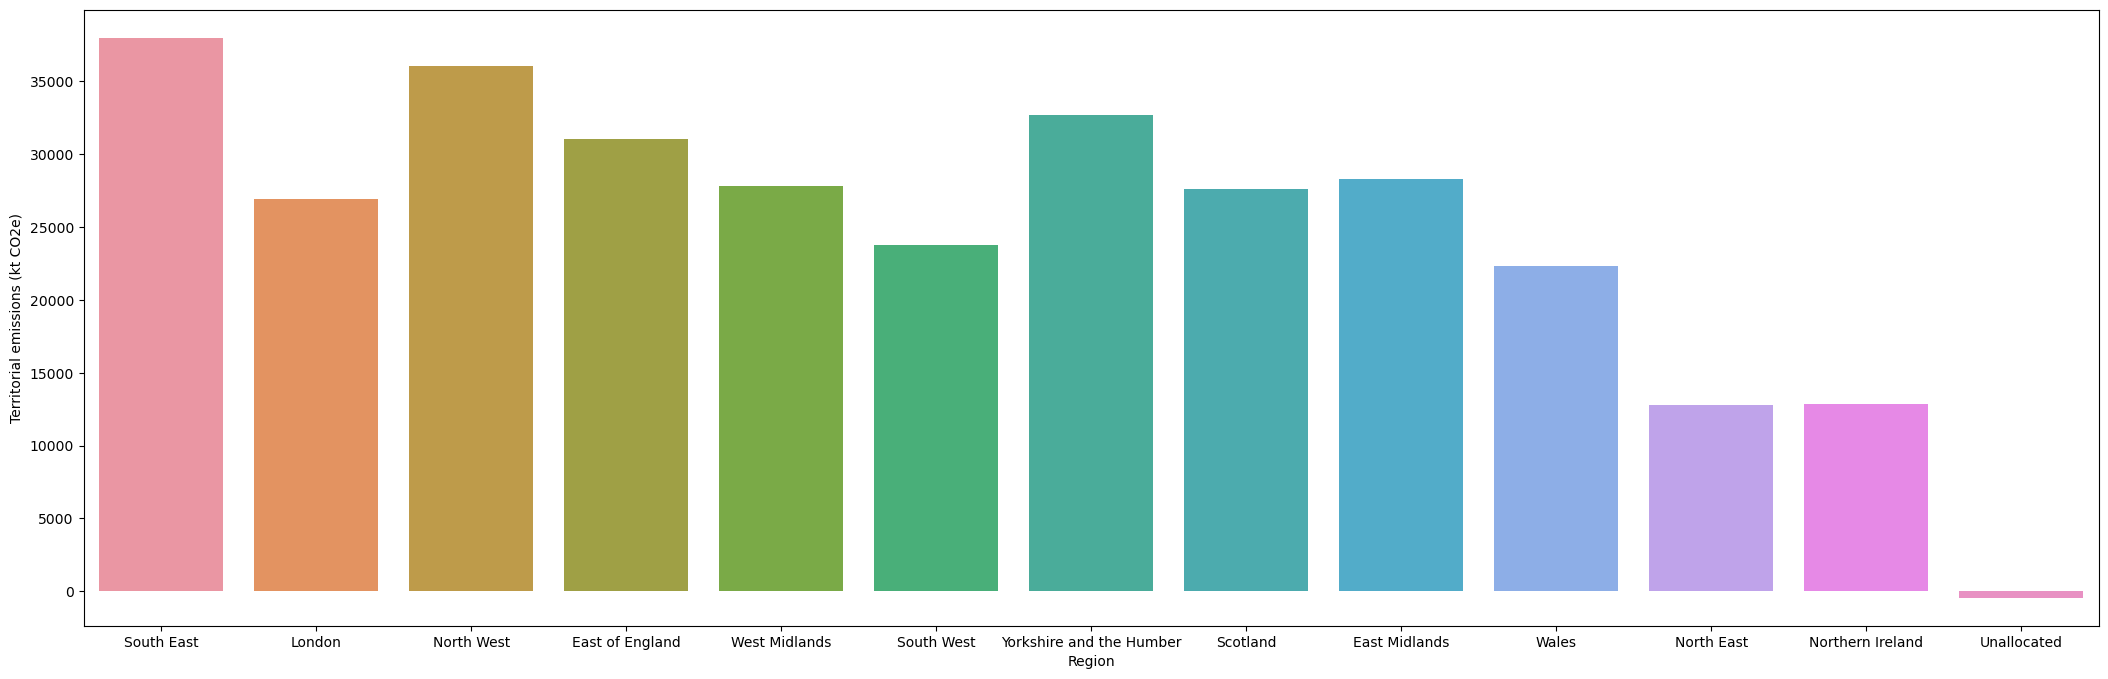

In [61]:
df_sector=df[['LA GHG Sector',"Territorial emissions (kt CO2e)"]].groupby(by=['LA GHG Sector']).sum().sort_values('LA GHG Sector',ascending=False)
display(pd.DataFrame(df_county['Territorial emissions (kt CO2e)']))
fig, ax = plt.subplots(1, 1, figsize=(26,8))
sns.barplot(x=df_county.index,y=df_county['Territorial emissions (kt CO2e)'], ax=ax)

The LA GHG Sector with the highest CO2 emissions in 2021 was Transport with 111412kt CO2 emitted


,2005 Territorial emissions (kt CO2e),2021 Territorial emissions (kt CO2e)
LA GHG Sector,,
Domestic,152403,93292
Industry,140793,80584
Transport,135835,111412
Commercial,70903,16352
Public Sector,24254,15147
Agriculture,9034,8555
Waste management,453,258
LULUCF,-3710,-5890


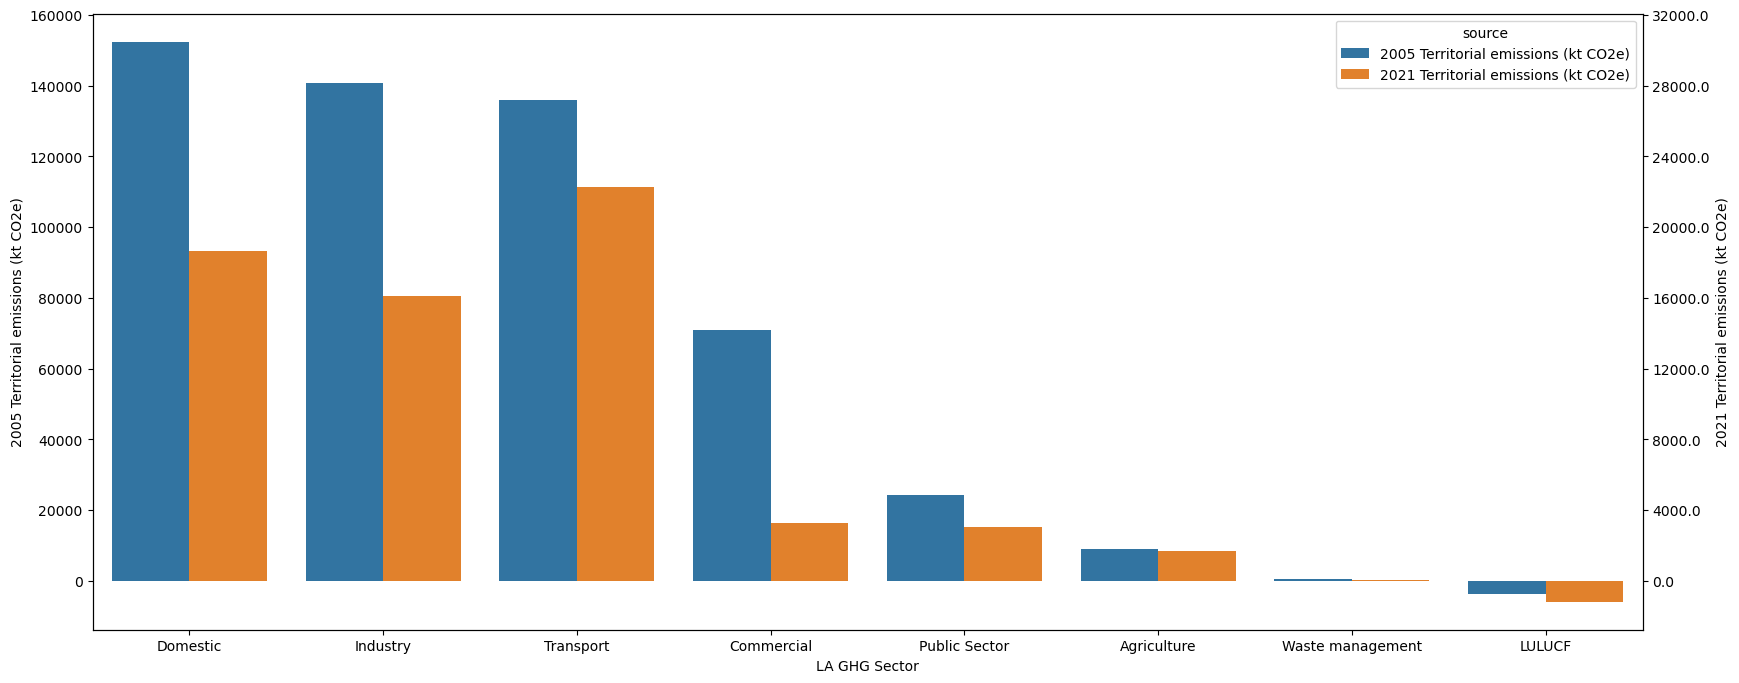

In [62]:
df = pd.read_csv(train_file_path)
df=df[df['Greenhouse gas']=='CO2'][df['Calendar Year']==2005]
df['Territorial emissions (kt CO2e)']=df['Territorial emissions (kt CO2e)'].astype(int)
df['Mid-year Population (thousands)']=df['Mid-year Population (thousands)'].fillna(0,inplace=False).astype(int)

df_county=df.groupby(by=['LA GHG Sector']).sum().sort_values('Territorial emissions (kt CO2e)',ascending=False)
df_2005=pd.DataFrame(df_county['Territorial emissions (kt CO2e)'])

df = pd.read_csv(train_file_path)
df=df[df['Greenhouse gas']=='CO2'][df['Calendar Year']==2021]
df['Territorial emissions (kt CO2e)']=df['Territorial emissions (kt CO2e)'].astype(int)
df['Mid-year Population (thousands)']=df['Mid-year Population (thousands)'].fillna(0,inplace=False).astype(int)

df_county=df.groupby(by=['LA GHG Sector']).sum().sort_values('Territorial emissions (kt CO2e)',ascending=False)
df_2021=pd.DataFrame(df_county['Territorial emissions (kt CO2e)'])


merged_df=df_2005.merge(df_2021,on='LA GHG Sector')
merged_df.columns = [ '2005 Territorial emissions (kt CO2e)','2021 Territorial emissions (kt CO2e)']
display(merged_df)
merged_df['LA GHG Sector']=b.index

test_data=merged_df.dropna()

test_data_melted = pd.melt(test_data, id_vars="LA GHG Sector",\
                           var_name="source", value_name="value_numbers")


# Plot
fig, ax1 = plt.subplots( figsize=(20,8))
g = sns.barplot(x="LA GHG Sector", y="value_numbers", hue="source",\
                data=test_data_melted, ax=ax1)

# Create a second y-axis with the scaled ticks
ax1.set_ylabel('2005 Territorial emissions (kt CO2e)')
ax2 = ax1.twinx()

# Ensure ticks occur at the same positions, then modify labels
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticklabels(np.round(ax1.get_yticks()/scale,1))
ax2.set_ylabel('2021 Territorial emissions (kt CO2e)')

plt.show()

This decrease in emissions from 2005-2021 is notably less than the average decrease with other sectors decreasing by far more between 2005 and 2021